# PROJET IA for HumanForYou - Prétraitement des Données

|Auteur|
|---|
|G. DUBOYS DE LAVIGERIE|
|T. VILLETTE|
|O. BOUSSARD|
|A. BRICON|

## Objectifs du Livrable

Ce notebook vise à prétraiter les différentes sources de données fournies par HumanForYou. Les principales étapes comprennent :

1. **Nettoyage des données :** Élimination des valeurs manquantes, correction d'erreurs potentielles.
2. **Transformation des données :** Préparation des données pour l'analyse et la modélisation.
3. **Création de nouvelles caractéristiques :** Le cas échéant, créer de nouvelles caractéristiques basées sur les données existantes.

## Attendus

À la fin de ce notebook, les données seront prêtes à être explorées et utilisées pour l'analyse et le développement du modèle d'IA.

### 1. Préparation de l'environnement

Pour faciliter l'importation des bibliothèques nécessaires au bon fonctionnement du code, veuillez exécuter le fichier `setup.ipynb`. Ce fichier s'occupe de configurer l'environnement en important toutes les librairies essentielles. 

In [1]:
# Compatibilité python 2 et python 3
from __future__ import division, print_function, unicode_literals

# Import de Numpy
import numpy as np

# Stabilité du notebook d'une exécution à l'autre
np.random.seed(42)

# Paramétrer le rendu des figures affichées dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignorer les warnings inutiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### 2. Import des données

Dans cette section, nous automatisons le processus d'importation des données en implémentant une fonction qui effectue les étapes suivantes :
1. Téléchargement de l'archive contenant les fichiers.
2. Extraction des fichiers de l'archive.

Le code ci-dessous réalise le chargement des fichiers suivants :
- `employee_survey_data.csv`
- `general_data.csv`
- `in_time.csv`
- `out_time.csv`
- `manager_survey_data.csv`

De même, on va créer une fonction utilisant [`pandas`](https://pandas.pydata.org/) qui charge les données en mémoire dans un [`Pandas DataFrame`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame).

In [2]:
# Imports
import os
import zipfile
from six.moves import urllib
import pandas as pd
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None) # Retirer la limite de colonnes à afficher

# Path
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/"
REPO_PATH = "AnatholyB1/AI_A4/main/"
DATA_PATH = os.path.join("../datasets", "all")
DATA_URL = DOWNLOAD_ROOT + REPO_PATH + "data.zip"

# Récupérer et extraire les fichiers de données
def fetch_data(data_url=DATA_URL, data_path=DATA_PATH):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    zip_path = os.path.join(data_path, "data.zip")
    urllib.request.urlretrieve(data_url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_path)

fetch_data()

# Charger les fichiers de données
def load_employee_data(housing_path=DATA_PATH):
    csv_path = os.path.join(housing_path + "\employe", "employee_survey_data.csv")
    return pd.read_csv(csv_path)

def load_general_data(housing_path=DATA_PATH):
    csv_path = os.path.join(housing_path + "\general", "general_data.csv")
    return pd.read_csv(csv_path)

def load_in_time_data(housing_path=DATA_PATH):
    csv_path = os.path.join(housing_path + "\in_out_time", "in_time.csv")
    return pd.read_csv(csv_path)

def load_out_time_data(housing_path=DATA_PATH):
    csv_path = os.path.join(housing_path + "\in_out_time", "out_time.csv")
    return pd.read_csv(csv_path)

def load_manager_data(housing_path=DATA_PATH):
    csv_path = os.path.join(housing_path + "\manager", "manager_survey_data.csv")
    return pd.read_csv(csv_path)

employee = load_employee_data()
general = load_general_data()
in_time = load_in_time_data()
out_time = load_out_time_data()
manager = load_manager_data()

### 3. Analyse et préparation des différents fichiers de données

Dans cette partie, nous étudions les données de chacun des fichiers et apportons des modifications afin de les préparer au mieux au modèle.

#### 3.1. General data
<u>Analyse des données</u><br>
On analyse les données du fichier general_data.

In [3]:
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

On remarque que les colonnes NumCompaniesWorked et TotalWorkingYears ont des valeurs manquantes. On remarque également que 8 colonnes ne contiennent pas de valeurs numériques.<br><br>
Pour chacune des données, on regarde de le type de donnée et le nombre de valeurs différentes. Par exemple, la colonne Department contient 3 valeurs possibles : 'Research & Development', 'Sales' et 'Human Resources'. On remarque que les colonnes StandardHours, EmployeeCount et Over18 ont toujours la même valeur.

In [4]:
general['Department'].value_counts()

Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64

Ensuite, on affiche des figures de toutes les colonnes afin de visualiser les valeurs.

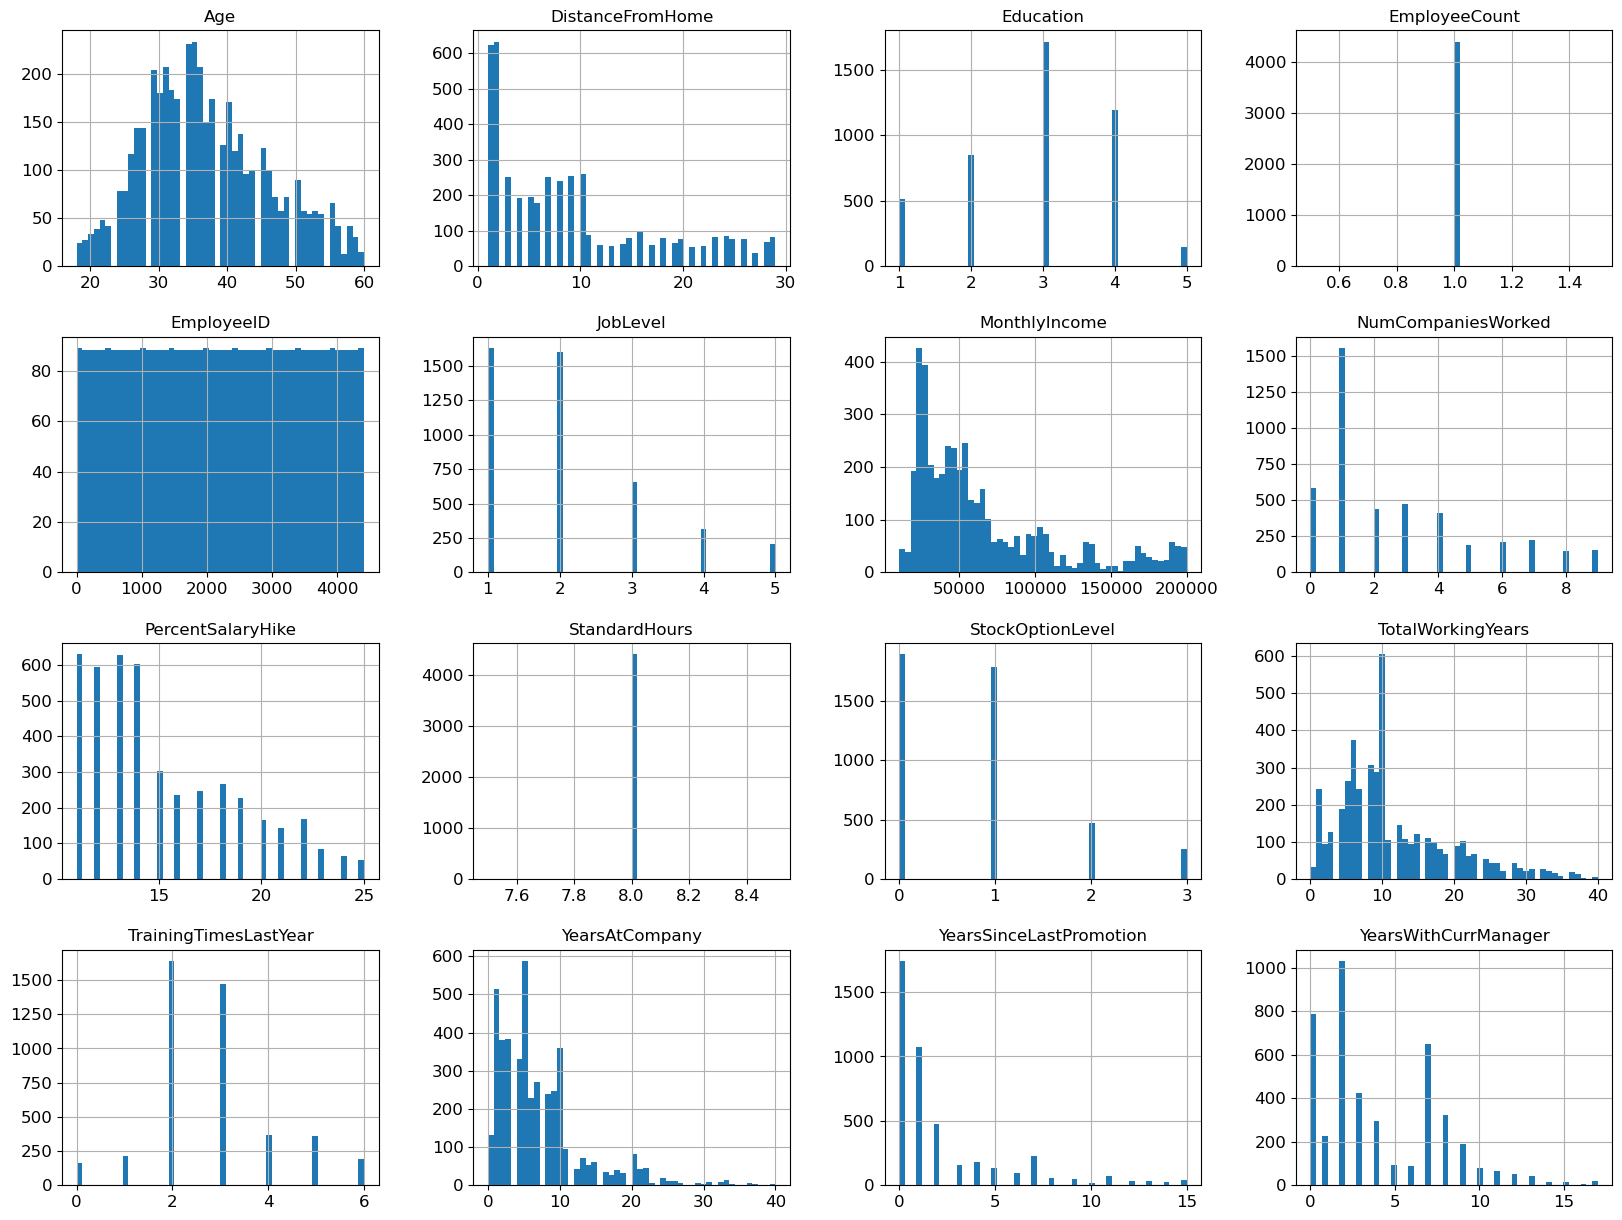

In [5]:
general.hist(bins=50, figsize=(20,15))
plt.show()

D'après ces histogrammes, nos données ne semblent pas contenir de valeurs aberrantes.

Voici un tableau qui résume toutes les informations :
| **Variable**           | **Type de données** | **Nombre de valeurs Manquantes** | **Nature de la variable** | **Nombre de catégories uniques** |
|------------------------|---------------------|----------------------------------|---------------------------|----------------------------------|
| **Age**                | Quantitative        | 0                                | Ordinal                   | 35                               |
| **Attrition**          | Qualitative         | 0                                | Nominal (Booléen)         | 2                                |
| **BusinessTravel**     | Qualitative         | 0                                | Ordinal                   | 3                                |
| **Department**         | Qualitative         | 0                                | Nominal                   | 3                                |
| **DistanceFromHome**   | Quantitative        | 0                                | Ordinal                   | 16                               |
| **Education**          | Quantitative        | 0                                | Ordinal                   | 5                                |
| **EducationField**     | Qualitative         | 0                                | Nominal                   | 6                                |
| **EmployeeCount**      | Quantitative        | 0                                | Ordinal                   | 1                                |
| **EmployeeID**         | Quantitative        | 0                                | Ordinal                   | 4410                             |
| **Gender**             | Qualitative         | 0                                | Nominal (Booléen)         | 2                                |
| **JobLevel**           | Quantitative        | 0                                | Ordinal                   | 5                                |
| **JobRole**            | Qualitative         | 0                                | Nominal                   | 9                                |
| **MaritalStatus**      | Qualitative         | 0                                | Nominal                   | 3                                |
| **MonthlyIncome**      | Quantitative        | 0                                | Ordinal                   | 1349                             |
| **NumCompaniesWorked** | Quantitative        | 19                               | Ordinal                   | 10                               |
| **Over18**             | Qualitative         | 0                                | Nominal                   | 1                                |
| **PercentSalaryHike**  | Quantitative        | 0                                | Ordinal                   | 14                               |
| **StandardHours**      | Quantitative        | 0                                | Ordinal                   | 1                                |
| **StockOptionLevel**   | Quantitative        | 0                                | Ordinal                   | 4                                |
| **TotalWorkingYears**  | Quantitative        | 9                                | Ordinal                   | 29                               |
| **TrainingTimesLastYear** | Quantitative      | 0                                | Ordinal                   | 7                                |
| **YearsAtCompany**     | Quantitative        | 0                                | Ordinal                   | 29                               |
| **YearsSinceLastPromotion** | Quantitative    | 0                                | Ordinal                   | 15                               |
| **YearsWithCurrManager** | Quantitative      | 0                                | Ordinal                   | 16                               |

<u>Préparation des données</u><br>
L'analyse de ces données nous permet de connaître les modifications à apporter au jeu de données pour le préparer au mieux au modèle de machine learning.<br>
Tout d'abord, on supprime les colonnes inutiles Over18, EmployeeCount et StandardHours car la valeur est toujours la même et n'influe donc pas sur le taux de rotation des employés. <br>
Ensuite, on crée un pipeline pour nettoyer et transformer les données. Le pipeline est composé de 2 étapes :
- Remplacer les valeurs nulles :
Chaque valeur manquante est remplacée par la médiane de la colonne. Les valeurs ordinales sont numérisées. On utilise la fonction SimpleImputer de sklearn.
- Numériser les données qualitatives :
Pour les valeurs qualitatives ordinales, on utilise OrdinalEncoder. 
Pour les valeurs qualitatives nominales, on utilise OneHotEncoder. Une colonne booléenne sera créée pour chaque catégorie. Par exemple, la colonne Department donnera les 3 colonnes Research & Development, Sales et Human Resources.

In [6]:
# Supprimer les colonnes inutiles
general_dr = general.drop(['Over18', 'EmployeeCount', 'StandardHours'], axis=1)

# Préparer le pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

general_num = general_dr.select_dtypes(include=[np.number]) # DataFrame uniquement avec les valeurs numériques
num_attribs = list(general_num) # Récupérer les noms des colonnes numériques

general_cat_ordinal = ['BusinessTravel', 'Attrition', 'Gender'] # Colonnes qualitatives avec des valeurs ordinales
general_cat_nominal = ['Department','EducationField','JobRole','MaritalStatus'] # Colonnes qualitatives avec des valeurs nominales

# Pipeline numérique
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), # Remplacer les valeurs nulles par ma médiane des valeurs de la colonne
])

# Pipeline complet
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat_nom", OneHotEncoder(), general_cat_nominal), # Numériser les colonnes qualitatives avec des valeurs nominales
    ("cat_ord", OrdinalEncoder(), general_cat_ordinal), # Numériser les colonnes qualitatives avec des valeurs ordinales
])

# Appliquer le pipeline au DataFrame initial
general_tr = full_pipeline.fit_transform(general_dr)

# Créer un DataFrame à partir du résultat
general_prepared = pd.DataFrame(general_tr, columns=full_pipeline.get_feature_names_out())

#### 3.2. Employee survey data

On analyse et prépare les données du fichier employee_survey_data avec la même méthode que dans la partie précédente. La seule transformation appliquée dans ce fichier est le remplacement des valeurs nulles par la médiane.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Créer un pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])


# Appliquer le pipeline à l'ensemble du DataFrame
employee_transformed = numeric_transformer.fit_transform(employee)

# Transformer le résultat du pipeline en DataFrame
employee_df = pd.DataFrame(employee_transformed, columns = employee.columns)

#### 3.3. In_time et Out_time
Pour les fichiers In_time et Out_time, on convertit toutes les valeurs en DateTime car elles sont plus simples à manipuler.

In [9]:
# Convertir toutes les valeurs en DateTime
def convert_all_to_datetime(df):
    year_dict = {}
    month_dict = {}
    day_dict = {}

    for column_name in df.columns:
        try:
            df[column_name] = pd.to_datetime(df[column_name])
            year_dict[column_name + '-year'] = df[column_name].dt.year
            month_dict[column_name + '-month'] = df[column_name].dt.month
            day_dict[column_name + '-day'] = df[column_name].dt.day
        except ValueError:
            # Passe les valeurs qui ne peuvent pas être converties en DateTime
            pass

    year_df = pd.DataFrame(year_dict)
    month_df = pd.DataFrame(month_dict)
    day_df = pd.DataFrame(day_dict)

    df = pd.concat([df, year_df, month_df, day_df], axis=1)
    return df

# Convertir en DateTime toutes les valeurs des fichiers Out_time et In_time
in_time = convert_all_to_datetime(in_time)
out_time = convert_all_to_datetime(out_time)

Ensuite, on utilise un pipeline pour préparer les données au modèle de machine learning. Les actions du pipeline sont les suivantes :
- Supprimer les colonnes qui ne sont pas des dates.
- Remplacer les valeurs nulles. Lorsqu'une valeur est manquante dans un fichier, on peut la calculer grâce à la valeur correspondante dans l'autre fichier. Si une les 2 valeurs correspondantes sont nulles dans les 2 fichiers, on supprime la ligne.
- Transformer toutes les données pour ne garder que la moyenne, le médian, le minimum et le maximum. Ces valeurs seront plus simples à traiter que des DateTime sur toute une année.
- Ajouter l'Employee_ID pour pouvoir faire la liaison avec les autres fichiers de données.

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
 
# Calcule les valeurs manquantes et supprime les colonnes qui ne sont pas des dates
def convert_all_to_datetime(X,  Y):    
    cols_to_drop = X.filter(regex='-day$').columns
    X = X.drop(cols_to_drop, axis=1)
    cols_to_drop = X.filter(regex='-month$').columns
    X = X.drop(cols_to_drop, axis=1)
    cols_to_drop = X.filter(regex='-year$').columns
    X = X.drop(cols_to_drop, axis=1)


    first_column = X.columns[0]
    X = X.drop([first_column], axis=1)
    # Supprimer les colonnes où toutes les valeurs sont NaT
    X = X.dropna(axis=1, how='all')

    cols_to_drop = Y.filter(regex='-day$').columns
    Y = Y.drop(cols_to_drop, axis=1)
    cols_to_drop = Y.filter(regex='-month$').columns
    Y = Y.drop(cols_to_drop, axis=1)
    cols_to_drop = Y.filter(regex='-year$').columns
    Y = Y.drop(cols_to_drop, axis=1)


    first_column = Y.columns[0]
    Y = Y.drop([first_column], axis=1)

    # Supprimer les colonnes où toutes les valeurs sont NaT
    Y = Y.dropna(axis=1, how='all')


    # Calculer la médiane du temps horaire pour chaque personne
    median_time = (Y - X).median()

    for column in X.columns:
        # Trouver où les valeurs sont manquantes
        in_time_nan = X[column].isna()
        out_time_nan = Y[column].isna()

        # Si 'in_time' est manquant, soustraire la médiane du temps horaire à 'out_time'
        X.loc[in_time_nan, column] = X.loc[in_time_nan, column] - median_time[column]

        # Si 'out_time' est manquant, ajouter la médiane du temps horaire à 'in_time'
        Y.loc[out_time_nan, column] = Y.loc[out_time_nan, column] + median_time[column]
    
    return  Y - X


# Transformer les données pour ne garder que la moyenne, le médian, le minimum et le maximum
class PreTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imputer = SimpleImputer(strategy="median")

    def fit(self, X, y=None):
        self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        for col in X.columns:
            X[col] = X[col].apply(lambda x: x.total_seconds() / 3600 if pd.notnull(x) else np.nan)    
        stats = pd.DataFrame()
        stats['mean'] = pd.Series(X.mean(axis=1))
        stats['median'] = pd.Series(X.median(axis=1))
        stats['min'] = pd.Series(X.min(axis=1))
        stats['max'] = pd.Series(X.max(axis=1))
        return stats, stats.columns
        # Convertir les timedelta en une quantité numérique représentant le nombre d'heures


# Définir le pipeline
num_pipeline = Pipeline([
    ('pre_transformer', PreTransformer()),
])

# Appliquer le pipeline
hourly_time_prepared, stats_col = num_pipeline.fit_transform(convert_all_to_datetime(in_time, out_time))

hourly_time_prepared = pd.DataFrame(hourly_time_prepared, columns= stats_col )

#Ajouter la colonne 'EmployeeID' pour pouvoir joindre les DataFrames
hourly_time_prepared['EmployeeID'] = employee_df['EmployeeID']


Voici un aperçu des données après ces transformations :

In [12]:
hourly_time_prepared.head()

,mean,median,min,max,EmployeeID
0,7.373651,7.397222,6.504722,7.948333,1.0
1,7.718969,7.718750,6.725278,8.558889,2.0
2,7.013240,6.982639,6.198333,7.993611,3.0
3,7.193678,7.179722,6.280556,7.890833,4.0
4,8.006175,7.963611,7.310278,8.828333,5.0


### 4. Jointure et préparation finale des données

Dans cette partie, nous fusionnons chacun des fichers en un seul jeu de données. Ensuite, nous préparons le jeu de données final.

#### 4.1. Fusion des données

Après avoir nettoyé les fichiers de données séparemment, nous fusionnons tous les fichiers pour ne former qu'un seul jeu de données.

In [19]:
# Utiliser la fonction merge pour faire la première jointure avec general
result = pd.merge(employee_df, manager, on='EmployeeID')

# Utiliser la fonction merge pour faire la deuxième jointure avec general_prepared
result = pd.merge(result, general_prepared, left_on='EmployeeID', right_on='num__EmployeeID')

# Utiliser la fonction merge pour faire la troisieme jointure avec hourly_time_prepared
result = pd.merge(result, hourly_time_prepared, on='EmployeeID')

# Aperçu des données
result.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,num__Age,num__DistanceFromHome,num__Education,num__EmployeeID,num__JobLevel,num__MonthlyIncome,num__NumCompaniesWorked,num__PercentSalaryHike,num__StockOptionLevel,num__TotalWorkingYears,num__TrainingTimesLastYear,num__YearsAtCompany,num__YearsSinceLastPromotion,num__YearsWithCurrManager,cat_nom__Department_Human Resources,cat_nom__Department_Research & Development,cat_nom__Department_Sales,cat_nom__EducationField_Human Resources,cat_nom__EducationField_Life Sciences,cat_nom__EducationField_Marketing,cat_nom__EducationField_Medical,cat_nom__EducationField_Other,cat_nom__EducationField_Technical Degree,cat_nom__JobRole_Healthcare Representative,cat_nom__JobRole_Human Resources,cat_nom__JobRole_Laboratory Technician,cat_nom__JobRole_Manager,cat_nom__JobRole_Manufacturing Director,cat_nom__JobRole_Research Director,cat_nom__JobRole_Research Scientist,cat_nom__JobRole_Sales Executive,cat_nom__JobRole_Sales Representative,cat_nom__MaritalStatus_Divorced,cat_nom__MaritalStatus_Married,cat_nom__MaritalStatus_Single,cat_ord__BusinessTravel,cat_ord__Attrition,cat_ord__Gender,mean,median,min,max
0,1.0,3.0,4.0,2.0,3,3,51.0,6.0,2.0,1.0,1.0,131160.0,1.0,11.0,0.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,7.373651,7.397222,6.504722,7.948333
1,2.0,3.0,2.0,4.0,2,4,31.0,10.0,1.0,2.0,1.0,41890.0,0.0,23.0,1.0,6.0,3.0,5.0,1.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,7.718969,7.718750,6.725278,8.558889
2,3.0,2.0,2.0,1.0,3,3,32.0,17.0,4.0,3.0,4.0,193280.0,1.0,15.0,3.0,5.0,2.0,5.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,7.013240,6.982639,6.198333,7.993611
3,4.0,4.0,4.0,3.0,2,3,38.0,2.0,5.0,4.0,3.0,83210.0,3.0,11.0,3.0,13.0,5.0,8.0,7.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.193678,7.179722,6.280556,7.890833
4,5.0,4.0,1.0,3.0,3,3,32.0,10.0,1.0,5.0,1.0,23420.0,4.0,12.0,2.0,9.0,2.0,6.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,8.006175,7.963611,7.310278,8.828333


#### 4.2. Préparation des données

On applique les dernières transformations pour préparer le jeu de données au modèle de machine learning. Tout d'abord, on supprime les colonnes Employee_ID qui ne sont plus utiles. <br>Ensuite, on applique une standardisation des données pour réduire les différences d'échelle des valeurs, ce qui permet d'avoir un même poids sur toutes les colonnes. Nous avons choisi une standardisation plutôt qu'une normalisation min-max car elle permet de conserver la structure originale des données.
<br>Enfin, on enregistre notre jeu de données dans un nouveau fichier CSV.

In [21]:
# Supprimer les colonnes Employee_ID
result_dr = result.drop(['EmployeeID', 'num__EmployeeID'], axis=1)

# Créer un pipeline
result_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Standardiser les données
result_array = result_transformer.fit_transform(result_dr)
result_final = pd.DataFrame(result_array, columns = result_dr.columns)

# Enregistrer les données résultantes dans un nouveau fichier CSV
result_final.to_csv('../datasets/data_preprocessing.csv', index=False)

# Aperçu du jeu de données final
result_final.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,num__Age,num__DistanceFromHome,num__Education,num__JobLevel,num__MonthlyIncome,num__NumCompaniesWorked,num__PercentSalaryHike,num__StockOptionLevel,num__TotalWorkingYears,num__TrainingTimesLastYear,num__YearsAtCompany,num__YearsSinceLastPromotion,num__YearsWithCurrManager,cat_nom__Department_Human Resources,cat_nom__Department_Research & Development,cat_nom__Department_Sales,cat_nom__EducationField_Human Resources,cat_nom__EducationField_Life Sciences,cat_nom__EducationField_Marketing,cat_nom__EducationField_Medical,cat_nom__EducationField_Other,cat_nom__EducationField_Technical Degree,cat_nom__JobRole_Healthcare Representative,cat_nom__JobRole_Human Resources,cat_nom__JobRole_Laboratory Technician,cat_nom__JobRole_Manager,cat_nom__JobRole_Manufacturing Director,cat_nom__JobRole_Research Director,cat_nom__JobRole_Research Scientist,cat_nom__JobRole_Sales Executive,cat_nom__JobRole_Sales Representative,cat_nom__MaritalStatus_Divorced,cat_nom__MaritalStatus_Married,cat_nom__MaritalStatus_Single,cat_ord__BusinessTravel,cat_ord__Attrition,cat_ord__Gender,mean,median,min,max
0,0.252200,1.156302,-1.085336,0.379672,-0.426230,1.541369,-0.393938,-0.891688,-0.961486,1.405136,-0.678464,-1.150554,-0.932014,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,-0.211604,-1.374051,1.515244,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,3.197088,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.590048,-0.438422,-1.224745,-0.244123,-0.226421,-0.264395,-0.440893
1,0.252200,-0.663899,1.757749,-1.026167,2.346151,-0.648668,0.099639,-1.868426,-0.961486,-0.491661,-1.079486,2.129306,0.241988,-0.678877,0.155707,-0.327893,-0.368715,-0.034520,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,-0.913194,2.280906,-1.224745,0.013564,0.013492,-0.100740,0.013869
2,-0.665460,-0.663899,-2.506879,0.379672,-0.426230,-0.539166,0.963398,1.061787,1.749610,2.725053,-0.678464,-0.057267,2.589994,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,1.088232,-0.685565,-0.913194,-0.438422,0.816497,-0.513073,-0.535768,-0.491738,-0.407169
3,1.169861,1.156302,0.336206,-1.026167,-0.426230,0.117845,-0.887515,2.038524,0.845911,0.386301,0.123580,-1.150554,2.589994,0.221606,1.707500,0.161947,1.493867,0.245834,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.312785,5.221995,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-2.416437,-0.438422,0.816497,-0.378424,-0.388711,-0.430729,-0.483721
4,1.169861,-1.573999,0.336206,0.379672,-0.426230,-0.539166,0.099639,-1.868426,-0.961486,-0.884109,0.524602,-0.877232,1.415991,-0.292956,-0.620189,-0.164613,-0.679146,-0.034520,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,0.590048,-0.438422,0.816497,0.227886,0.196198,0.333336,0.214561


### 5. Corrélation des données

On teste la corrélation des données pour savoir quelles colonnes ont les plus d'influence sur l'attrition.

In [22]:
from sklearn.model_selection import train_test_split

# Supposons que vous voulez prédire 'cat_nom__Attrition_Yes'
y = result['cat_ord__Attrition']
X = result.drop(['cat_ord__Attrition'], axis=1)

# Diviser les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_df = pd.DataFrame(pd.concat([X_train, y_train], axis = 1), columns=result.columns)


# Calculer la matrice de corrélation
corr_matrix = train_df.corr()
# Filtrer les corrélations
filtered_corr_matrix = corr_matrix.where((corr_matrix >= 0.4) | (corr_matrix <= -0.4))

# Trier la colonne 'cat_nom__Attrition_Yes' par valeur absolue
sorted_corr = corr_matrix['cat_ord__Attrition'].apply(abs).sort_values(ascending=False)

# Afficher les éléments les plus corrélés avec 'cat_nom__Attrition_Yes'
sorted_corr

cat_ord__Attrition                            1.000000
mean                                          0.199109
median                                        0.199006
min                                           0.197643
max                                           0.196961
cat_nom__MaritalStatus_Single                 0.184336
num__TotalWorkingYears                        0.181715
num__YearsWithCurrManager                     0.168111
num__Age                                      0.165891
num__YearsAtCompany                           0.148827
JobSatisfaction                               0.125388
EnvironmentSatisfaction                       0.106991
cat_nom__MaritalStatus_Married                0.097748
cat_nom__EducationField_Human Resources       0.090365
cat_nom__MaritalStatus_Divorced               0.089553
cat_nom__Department_Human Resources           0.081012
cat_nom__JobRole_Research Director            0.061039
num__TrainingTimesLastYear                    0.055528
WorkLifeBa

On remarque que certaines colonnes ont plus d'influences sur le taux de rotation des employés. Par exemple, les dates de départ et d'arrivée, l'âge, la satisfaction au travail ou le nombre d'années de travail pour le même type de poste sont des informations qui semblent avoir une importance dans l'attrition.

### Conclusion
Dans ce livrable, nous avons analysé et nettoyé les données de chacun des fichiers CSV en remplaçant les valeurs manquantes ou numérisant les valeurs qualitatives par exemple. Ensuite, nous avons fusionné chaque fichier en un seul jeu de données que nous avons standardisé pour le préparer au mieux au modèle de machine learning. Enfin, une fois les données prêtes, nous avons analysé la corrélation du jeu de données pour savoir quels paramètres ont une influences sur l'attrition.